In [1]:
import os
import numpy as np
from glob import glob
from skimage.io import imread,imsave
import numpy as np
from matplotlib import pyplot as plt
import tqdm
from rasterio.plot import reshape_as_image
import rasterio
from natsort import natsorted
import random
import albumentations as A

d:\DeepLearning\DL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_dataset = []
label_dataset = []
img_paths= natsorted(glob('D:\DeepLearning\Projects\Arecanut_segmentation\Data\chips\images/'+'*.tif'))
label_paths= natsorted(glob('D:\DeepLearning\Projects\Arecanut_segmentation\Data\chips\masks/'+'*.tif'))

for i,files in tqdm.tqdm(enumerate(img_paths),'Reading Data',total=len(img_paths)):
    ds = rasterio.open(files)
    ls = rasterio.open(label_paths[i])
    image = reshape_as_image(ds.read([1,2,3]))
    label = reshape_as_image(ls.read())
    image_dataset.append(image)
    label_dataset.append(label)
images = np.array(image_dataset)
labels =  np.array(label_dataset)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ahmeds\AppData\Local\Temp\ipykernel_7948\1850808252.py:3: SyntaxWarning: invalid escape sequence '\D'
  img_paths= natsorted(glob('D:\DeepLearning\Projects\Arecanut_segmentation\Data\chips\images/'+'*.tif'))
C:\Users\Ahmeds\AppData\Local\Temp\ipykernel_7948\1850808252.py:4: SyntaxWarning: invalid escape sequence '\D'
  label_paths= natsorted(glob('D:\DeepLearning\Projects\Arecanut_segmentation\Data\chips\masks/'+'*.tif'))
Reading Data: 100%|██████████| 825/825 [00:08<00:00, 95.15it/s] 


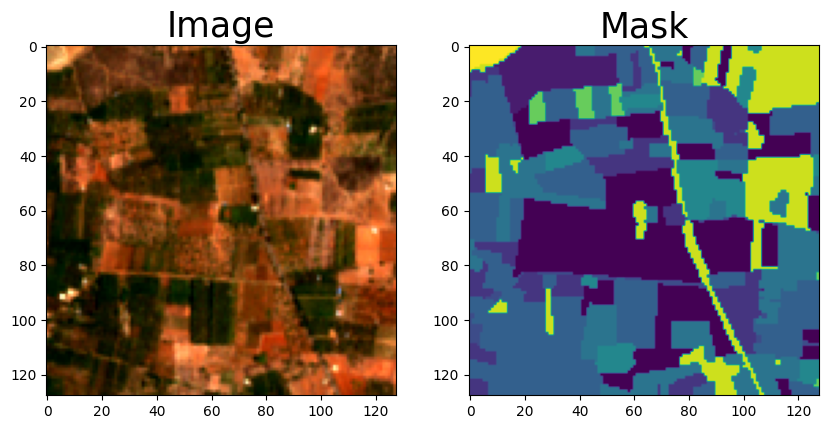

In [5]:
img_number = random.randint(0, images.shape[0]-1)
img = images[img_number]
mask = labels[img_number]
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title('Image',size = 25)
plt.imshow(img[:,:,0:3])
plt.subplot(2,2,2)
plt.title('Mask',size = 25)
plt.imshow(mask)
plt.show()

In [8]:
i=1   # variable to iterate till images_to_generate
img = []
mask1 = []
number_of_transformation = 5
while i<=(images.shape[0]):
    number = random.randint(0, images.shape[0]-1)  #PIck a number to select an image & mask
    image = images[number]
    mask = labels[number]
    aug = A.Compose([A.RandomCrop(30,90,p=1),A.Resize(128,128)])
    augmented = aug(image=image, mask=mask)
    x1 = augmented["image"]
    y1 = augmented["mask"]

    aug = A.RandomRotate90(p=1.0)
    augmented = aug(image=image, mask=mask)
    x2 = augmented['image']
    y2 = augmented['mask']

    aug = A.GridDistortion(p=1.0)
    augmented = aug(image=image, mask=mask)
    x3 = augmented['image']
    y3 = augmented['mask']

    aug = A.HorizontalFlip(p=1.0)
    augmented = aug(image=image, mask=mask)
    x4 = augmented['image']
    y4 = augmented['mask']

    aug = A.VerticalFlip(p=1.0)
    augmented = aug(image=image, mask=mask)
    x5 = augmented['image']
    y5 = augmented['mask']
    
    aug = A.OpticalDistortion(distort_limit=1, shift_limit=0.5,p=1)
    augmented = aug(image=image, mask=mask)
    x6 = augmented['image']
    y6 = augmented['mask']   

    aug = A.Transpose(p=1)
    augmented = aug(image=image, mask=mask)
    x7 = augmented['image']
    y7 = augmented['mask'] 
 
    aug = A.Compose([
        A.OneOf([
            A.RandomSizedCrop(min_max_height=(50, 101), height=128, width=128, p=0.5),
            A.PadIfNeeded(min_height=128, min_width=128, p=0.5)
        ],p=1),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.OneOf([
            A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            A.GridDistortion(p=0.5),
            A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
        ], p=0.8)])   
    augmented = aug(image=image, mask=mask)
    x8 = augmented['image']
    y8 = augmented['mask'] 

    aug = A.Rotate(limit = 15,p=1.0)
    augmented = aug(image=image, mask=mask)
    x9 = augmented['image']
    y9 = augmented['mask']

    aug = A.Rotate(limit = 30,p=1.0)
    augmented = aug(image=image, mask=mask)
    x10 = augmented['image']
    y10 = augmented['mask']

    aug = A.Rotate(limit = 45,p=1.0)
    augmented = aug(image=image, mask=mask)
    x11= augmented['image']
    y11 = augmented['mask']    
 
    aug = A.Rotate(limit = 45,p=1.0)
    augmented = aug(image=image, mask=mask)
    x12 = augmented['image']
    y12 = augmented['mask'] 

    aug = A.Rotate(limit = 75,p=1.0)
    augmented = aug(image=image, mask=mask)
    x13 = augmented['image']
    y13 = augmented['mask'] 

    aug = A.RandomResizedCrop(height=128, width=128,p=1.0)
    augmented = aug(image=image, mask=mask)
    x14 = augmented['image']
    y14 = augmented['mask'] 
    
    img.append([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14])
    mask1.append([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14])
    i =i+1

newimages = np.array(img)
newmasks = np.array(mask1)

C:\Users\Ahmeds\AppData\Local\Temp\ipykernel_7948\3946422904.py:52: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),


In [9]:
newimages = newimages.reshape(-1,newimages.shape[-3],newimages.shape[-2],newimages.shape[-1])
newmasks = newmasks.reshape(-1,newmasks.shape[-3],newmasks.shape[-2])

In [10]:
finalimages = ((np.concatenate([newimages,images]))).astype(np.uint8)
finalmasks = np.concatenate([newmasks,labels[:,:,:,0]]).astype(np.uint8)

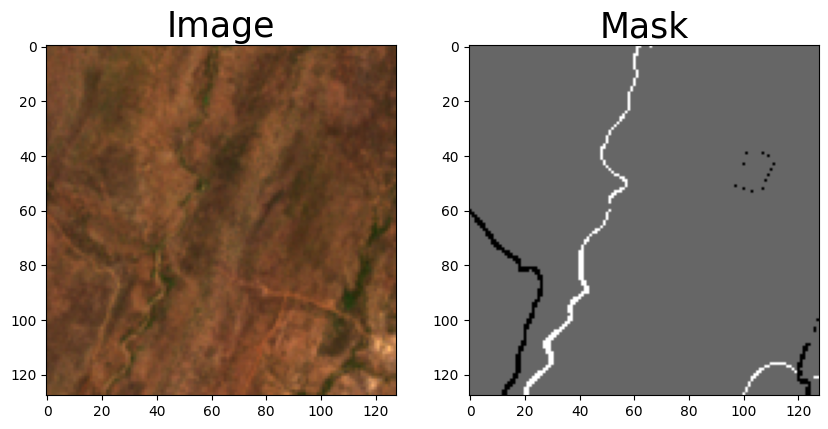

In [20]:
img_number = random.randint(0, finalimages.shape[0]-1)
img = finalimages[img_number]
mask = finalmasks[img_number]
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title('Image',size = 25)
plt.imshow(img[:,:,0:3])
plt.subplot(2,2,2)
plt.title('Mask',size = 25)
plt.imshow(mask,cmap='gray')
plt.show()

In [ ]:
for i in range(finalimages.shape[0]):
    image = finalimages[i,...]
    mask = finalmasks[i,...]
    imsave(rf'D:\DeepLearning\Projects\Arecanut_segmentation\Data\augmented_128\images\patch{i}.tif',image)
    imsave(rf'D:\DeepLearning\Projects\Arecanut_segmentation\Data\augmented_128\masks\patch{i}.tif',mask) 
        

In [1]:
import os

In [ ]:
bg = len(os.listdir('augmented_512/background/images/'))
bg


In [ ]:
dy = len(os.listdir('augmented_512/dynamic/images/'))
dy

In [ ]:
st = len(os.listdir('augmented_512/static/images/'))
st

In [ ]:
dy_st = len(os.listdir('augmented_512/dynamic_static/images/'))
dy_st